<a href="https://colab.research.google.com/github/stephe-hu/datasci_5_statistics/blob/main/hha507wk5hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load packages

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency as chi2, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt

# Chi-square test

In [61]:
data_alcohol = pd.read_csv('https://raw.githubusercontent.com/stephe-hu/datasci_5_statistics/main/datasets/student-por.csv')
data_alcohol

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [62]:
data_alcohol['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [63]:
data_alcohol['Walc'].value_counts()

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64

In [64]:
contingency_table = pd.crosstab(data_alcohol['sex'], data_alcohol['Walc'])
print(contingency_table)

Walc    1   2   3   4   5
sex                      
F     176  99  71  30   7
M      71  51  49  57  38


In [65]:
chi2, p, dof, pvalue = chi2(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 75.11252821231673
P-value: 1.8863257108548898e-15


## Null hypothesis (H0): There is no significant relationship between the sex of the students and their level of weekend alcohol consumption

## Alternate hypothesis (H1): There is a significant relationship between the sex of the students and their level of weekend alcohol consumption

## The p-value is less than common significance level of 0.05 and the chi2 value is 75. This shows that we can reject H0 and conclude that there is a significant relationship between the sex of the students and their level of weekend alcohol consumption.

## Rationale: There are many categorical columns in this dataset that can be used for chi-square analysis, I chose these two columns because I think that it will provide interesting insights about the students.

## Insights: There is a negative relationship between female students and the level of weekend alcohol consumption.






# T test

In [99]:
data_chronic = pd.read_csv('https://raw.githubusercontent.com/stephe-hu/datasci_5_statistics/main/datasets/Specific_Chronic_Conditions_2018_data.csv')
data_chronic = data_chronic[((data_chronic['Bene_Age_Lvl'] == '65+' ) | (data_chronic['Bene_Age_Lvl'] == '<65')) & (data_chronic['Prvlnc'].notnull())]
data_chronic


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN
5,State,Alabama,1.0,<65,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0465,NaN,NaN,NaN,NaN
7,State,Alabama,1.0,65+,Sex,Female,Alcohol Abuse,0.0058,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
236098,State,Wyoming,56.0,65+,All,All,Hypertension,0.4185,14091.718674,16051.028884,NaN,NaN
236099,State,Wyoming,56.0,65+,All,All,Ischemic Heart Disease,0.2113,16965.132331,19512.892238,NaN,NaN
236100,State,Wyoming,56.0,65+,All,All,Osteoporosis,0.0512,18563.682367,21084.682682,NaN,NaN
236101,State,Wyoming,56.0,65+,All,All,Schizophrenia and Other Psychotic Disorders,0.0067,21828.833222,24658.202736,NaN,NaN


In [117]:
depression_df = data_chronic[data_chronic['Bene_Cond'] == 'Depression']
depression_df

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
118,State,Alabama,1.0,65+,Dual Status,Medicare Only,Depression,0.1492,NaN,NaN,NaN,NaN
119,State,Alabama,1.0,<65,Dual Status,Medicare Only,Depression,0.2395,NaN,NaN,NaN,NaN
121,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Depression,0.2348,NaN,NaN,NaN,NaN
122,State,Alabama,1.0,<65,Dual Status,Medicare and Medicaid,Depression,0.2987,NaN,NaN,NaN,NaN
124,State,Alabama,1.0,65+,Sex,Female,Depression,0.2035,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
235986,County,Wyoming : Teton,56039.0,65+,All,All,Depression,0.1209,16690.257296,19483.447438,NaN,NaN
236007,County,Wyoming : Uinta,56041.0,65+,All,All,Depression,0.1311,20510.291601,22408.516307,NaN,NaN
236049,County,Wyoming : Washakie,56043.0,65+,All,All,Depression,0.1327,24894.104151,28949.295188,NaN,NaN
236070,County,Wyoming : Weston,56045.0,65+,All,All,Depression,0.0932,20972.822437,24144.673272,NaN,NaN


In [118]:
# Split the data into two groups: seniors and nonseniors
seniors_data = depression_df[depression_df['Bene_Age_Lvl'] == '65+']['Prvlnc']
seniors_data_mean = seniors_data.mean()
seniors_data_mean

0.15604950551003108

In [120]:
nonseniors_data = depression_df[depression_df['Bene_Age_Lvl'] == '<65']['Prvlnc']
nonseniors_data_mean = nonseniors_data.mean()
nonseniors_data_mean

0.3128153150607516

In [121]:
t_stat, p_val = ttest_ind(seniors_data, nonseniors_data, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -125.23465598266198
P-value: 0.0


## Null hypothesis (H0): There is no significant difference between the prevalence of depression in seniors and nonseniors.

## Alternate hypothesis (H1): There is a significant difference between the prevalence of depression in seniors and nonseniors.


## The large absolute T-statistic of 125 suggests a significant difference between the sample and the null hypothesis. The p-value of 0 is less than common significance level of 0.05. This shows that we can reject H0 and conclude that there is a significant difference between the prevalence of depression in seniors and nonseniors.

## Rationale: I chose this dataset because I think that multiple columns can be divided into two groups for t test.

## Insights: Nonseniors (<65 yrs old) have a higher average prevalence of depression in 2018.


# ANOVA

In [129]:
# Loading and cleaning dataset
deaths_df = pd.read_csv('/content/Alcohol-Related_Disease_Impact__ARDI__Application_-_Alcohol-Attributable_Deaths.csv')
# Retain rows where 'Data_Value_Alt' is not null
deaths_df = deaths_df[(deaths_df['Data_Value_Alt'].notnull())]
deaths_df


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Unit,Data_Value_Type,...,ConditionTypeID,CategoryID,Cause_of_DeathID,EffectID,ConsumptionID,SexID,AgeCategoryID,AgeGroupID,DataValueTypeID,DataValueUnitId
0,2015,2019,WV,West Virginia,ARDI,Chronic,Total,Total for All Causes,Alcohol-attributable deaths,5 years average,...,EXCSVE,TOT,TOTALL,HARMEFF,EXCSVE,GENF,UN21,Age0,AAD,5YEARSAVG
1,2015,2019,WV,West Virginia,ARDI,Total,Total,Total for All Causes,Alcohol-attributable deaths,5 years average,...,EXCSVE,TOT,TOTALL,HARMEFF,EXCSVE,GENF,UN21,Age0,AAD,5YEARSAVG
2,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,Alcohol-attributable deaths,5 years average,...,ACUTE,CAT6,ALCPOI,HARMEFF,EXCSVE,GENF,UN21,Age21,AAD,5YEARSAVG
3,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,Alcohol-attributable deaths,5 years average,...,ACUTE,CAT6,ALCPOI,HARMEFF,EXCSVE,GENM,OTH,Age0,AAD,5YEARSAVG
4,2015,2019,WV,West Virginia,ARDI,Acute,Total,Total for All Causes,Alcohol-attributable deaths,5 years average,...,ANYALC,TOT,TOTALL,HARMEFF,ANYALC,GENM,OTH,Age0,AAD,5YEARSAVG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62499,2015,2019,WY,Wyoming,ARDI,Chronic,Total,Total for All Causes,Alcohol-attributable deaths,5 years average,...,ANYALC,TOT,TOTALL,HARMEFF,ANYALC,GENALL,OTH,Age5,AAD,5YEARSAVG
62500,2015,2019,WY,Wyoming,ARDI,Total,Total,Total for All Causes,Alcohol-attributable deaths,5 years average,...,ANYALC,TOT,TOTALL,HARMEFF,ANYALC,GENALL,OTH,Age5,AAD,5YEARSAVG
62501,2015,2019,WY,Wyoming,ARDI,Acute,Total,Total for All Causes,Alcohol-attributable deaths,5 years average,...,EXCSVE,TOT,TOTALL,HARMEFF,EXCSVE,GENALL,OTH,Age5,AAD,5YEARSAVG
62502,2015,2019,WY,Wyoming,ARDI,Chronic,Total,Total for All Causes,Alcohol-attributable deaths,5 years average,...,EXCSVE,TOT,TOTALL,HARMEFF,EXCSVE,GENALL,OTH,Age5,AAD,5YEARSAVG


In [130]:
model = ols('Data_Value_Alt ~ C(Category) * C(AgeCategory)', data=deaths_df).fit()
model

In [131]:
# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                  sum_sq       df          F        PR(>F)
C(Category)                 2.616131e+09     10.0  27.755506  3.323586e-48
C(AgeCategory)              2.542221e+07      1.0   2.697137  1.005525e-01
C(Category):C(AgeCategory)  2.642636e+08     10.0   2.803671  2.741739e-03
Residual                    1.240413e+11  13160.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


## Null hypothesis (H0): There is no significant difference in number of deaths between the causes of death.

## Alternate hypothesis (H1): There is a significant difference in number of deaths between the causes of death.

## The p-value of 3.32e-48 is less than common significance level of 0.05. This shows that we can reject H0 and conclude that there is a significant difference in the number of deaths between the causes of death.

## Rationale: I chose this dataset because it contains multiple categorical variables with more than two levels/groups that can be used for anova.



# Regression Analysis

In [2]:
fat_df = pd.read_csv('https://raw.githubusercontent.com/stephe-hu/datasci_5_statistics/main/datasets/bodyfat.csv')
fat_df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [13]:
# Extracting data for regression
X = fat_df[['Abdomen']]
X = sm.add_constant(X)  # Add an intercept to our model
y = fat_df['BodyFat']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract model parameters
slope = model.params['Abdomen']
intercept = model.params['const']
r_squared = model.rsquared

# Display results
print(f"Slope (Coefficient for Abdomen): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_squared:.2f}")

# For a detailed summary:
print(model.summary())

# If you want to display predictions for the first 5 individuals
predictions = model.predict(X)
print("\nPredicted Body Fat for the first 10 individuals:")
for i, prediction in enumerate(predictions[:10]):
    print(f"Individual {i + 1}: {prediction:.2f}")

Slope (Coefficient for Abdomen): 0.63
Intercept: -39.28
R-squared value: 0.66
                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     488.9
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           9.09e-61
Time:                        19:54:07   Log-Likelihood:                -755.90
No. Observations:                 252   AIC:                             1516.
Df Residuals:                     250   BIC:                             1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

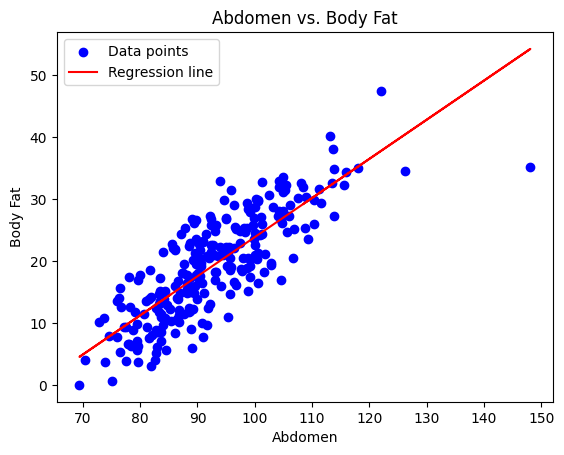

In [14]:
# Visualization
plt.scatter(X['Abdomen'], y, color='blue', label='Data points')
plt.plot(X['Abdomen'], predictions, color='red', label='Regression line')
plt.title('Abdomen vs. Body Fat')
plt.xlabel('Abdomen')
plt.ylabel('Body Fat')
plt.legend()
plt.show()

## Null hypothesis (H0): There is no significant relationship between the abdominal circumference and body fat of a person.

## Alternate hypothesis (H1): There is a significant relationship between the abdominal circumference and body fat of a person.

## A slope of 0.63 and an r value of 0.66 shows a moderately strong positive relationship between a person's abdominal circumference and body fat. Therefore, we can reject the H0 and conclude that there is a significant relationship between the abdominal circumference and body fat of a person. And that abdominal circumference can be a predictor for body fat.

## Rationale: I chose this dataset because I think that the variables are easy to perform a regression analysis and interpret on.

## Insights: In the dataset I notice that the majority of participants have an abdominal circumference of about 85-93 cm.